In [60]:
import pyreadstat
import pandas as pd
import numpy as np

from semopy import Model
from semopy.examples import multivariate_regression
from semopy import semplot
import semopy
from semopy import ModelMeans

import statsmodels.api as sm

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
model1 = '''

#D =~ guarpr_dpc + prevote_intpresst+guarpr_rpc+envir_gwarm+envir_nuke+envir_drill+envjob_rpc+envjob_dpc+inspre_dpc+inspre_rpc+ineq_incgap_x+ineqinc_ineqreduc+econcand_rwin+econcand_dwin+immigpo_level+immigpo_jobs+immig_policy+milln_milltax_x
F =~ iran_nukeinvd+iran_nuksanct+china_econ+war_worthit+war_terror+israel_support+defsppr_dpc+defsppr_rpc

presapp_foreignstr ~ iran_nukeinvd+iran_nuksanct+china_econ+war_worthit+war_terror+israel_support+defsppr_dpc+defsppr_rpc

#latent_dom, latent_for =~ prevote_intpreswho

#prevote_intpresst ~ guarpr_dpc + guarpr_rpc+envir_gwarm+envir_nuke+envir_drill+envjob_rpc+envjob_dpc+inspre_dpc+inspre_rpc+ineq_incgap_x+ineqinc_ineqreduc+econcand_rwin+econcand_dwin+immigpo_level+immigpo_jobs+immig_policy+milln_milltax_x + presapp_foreignstr+iran_nukeinvd+iran_nuksanct+china_econ+war_worthit+war_terror+israel_support+defsppr_dpc+defsppr_rpc
'''

In [4]:
df_demo = df[df["prevote_intpreswho"] == 1]
df_rep = df[df["prevote_intpreswho"] == 2]

In [5]:
semModel = Model(model1)
semModel.fit(df)
semModel.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,iran_nukeinvd,~,F,1.000000,-,-,-
1,iran_nuksanct,~,F,1.427681,0.033083,43.155113,0.0
2,china_econ,~,F,1.038007,0.027121,38.272688,0.0
3,war_worthit,~,F,0.088225,0.012398,7.115996,0.0
4,war_terror,~,F,0.025716,0.016032,1.604058,0.108701
5,israel_support,~,F,1.143653,0.028108,40.687904,0.0
6,defsppr_dpc,~,F,0.166230,0.037007,4.49185,0.000007
7,defsppr_rpc,~,F,0.418315,0.043633,9.587156,0.0
8,presapp_foreignstr,~,iran_nukeinvd,-0.008234,0.010002,-0.82324,0.410372
9,presapp_foreignstr,~,iran_nuksanct,0.062358,0.009601,6.495188,0.0


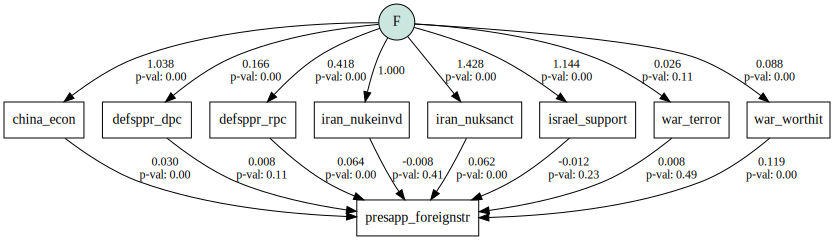

In [6]:
semplot(semModel,"model.png",plot_covs=True)

In [7]:
model2 = '''

D =~ guarpr_dpc + prevote_intpresst+guarpr_rpc+envir_gwarm+envir_nuke+envir_drill+envjob_rpc+envjob_dpc+inspre_dpc+inspre_rpc+ineq_incgap_x+ineqinc_ineqreduc+econcand_rwin+econcand_dwin+immigpo_level+immigpo_jobs+immig_policy+milln_milltax_x
F =~ iran_nukeinvd+iran_nuksanct+china_econ+war_worthit+war_terror+israel_support+defsppr_dpc+defsppr_rpc+prevote_intpresst

#presapp_foreignstr ~ iran_nukeinvd+iran_nuksanct+china_econ+war_worthit+war_terror+israel_support+defsppr_dpc+defsppr_rpc

#latent_dom, latent_for =~ prevote_intpresst

prevote_intpresst ~ guarpr_dpc + guarpr_rpc+envir_gwarm+envir_nuke+envir_drill+envjob_rpc+envjob_dpc+inspre_dpc+inspre_rpc+ineq_incgap_x+ineqinc_ineqreduc+econcand_rwin+econcand_dwin+immigpo_level+immigpo_jobs+immig_policy+milln_milltax_x + presapp_foreignstr+iran_nukeinvd+iran_nuksanct+china_econ+war_worthit+war_terror+israel_support+defsppr_dpc+defsppr_rpc
'''

In [8]:
semModel = Model(model2)
semModel.fit(df_demo)
semModel.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,guarpr_dpc,~,D,1.000000,-,-,-
1,guarpr_rpc,~,D,-9.793205,10.788895,-0.907712,0.364031
2,envir_gwarm,~,D,-1.755037,1.956028,-0.897245,0.369588
3,envir_nuke,~,D,-2.534571,2.833045,-0.894646,0.370977
4,envir_drill,~,D,-1.881954,2.159231,-0.871585,0.383435
...,...,...,...,...,...,...,...
77,iran_nukeinvd,~~,iran_nukeinvd,0.685497,0.020464,33.496922,0.0
78,F,~~,F,0.378860,0.023789,15.925632,0.0
79,F,~~,D,-0.017218,0.018839,-0.913957,0.360739
80,D,~~,D,0.000842,0.001842,0.45725,0.647492


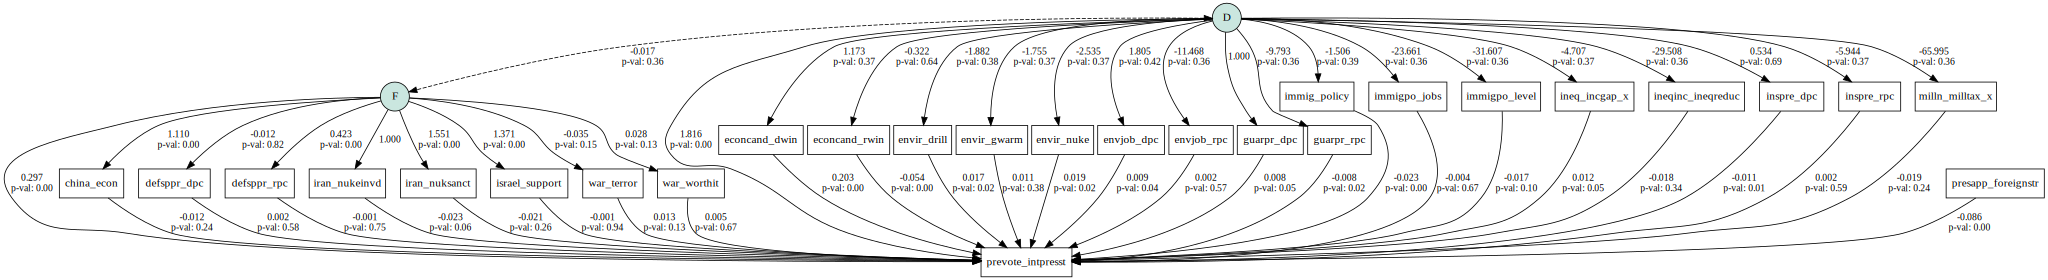

In [9]:
semplot(semModel,"model.png",plot_covs=True)

In [10]:
semModel = Model(model1)
semModel.fit(df_rep)
semModel.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,iran_nukeinvd,~,F,1.000000,-,-,-
1,iran_nuksanct,~,F,1.313801,0.053788,24.425532,0.0
2,china_econ,~,F,0.885392,0.041628,21.268967,0.0
3,war_worthit,~,F,0.046242,0.023205,1.99274,0.04629
4,war_terror,~,F,-0.020283,0.028381,-0.71466,0.474819
5,israel_support,~,F,0.926103,0.042572,21.753715,0.0
6,defsppr_dpc,~,F,-0.037190,0.061756,-0.602211,0.547034
7,defsppr_rpc,~,F,0.066853,0.054062,1.236603,0.216234
8,presapp_foreignstr,~,iran_nukeinvd,0.041020,0.015147,2.708141,0.006766
9,presapp_foreignstr,~,iran_nuksanct,0.055199,0.016245,3.397868,0.000679


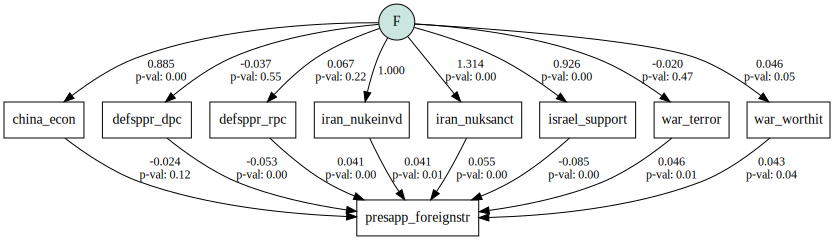

In [11]:
semplot(semModel,"model.png",plot_covs=True)

In [107]:
df = pd.read_csv('data.csv', low_memory=False)

In [108]:
df = df[df['prevote_intpresst'] > 0]

In [109]:
features = ['prevote_intpres',
 'prevote_intpreswho',
 'prevote_intpreswho_oth',
 'prevote_intpresst',
 'candaff_angdpcoft',
 'candaff_hpdpcoft',
 'candaff_afrdpcoft',
 'candaff_prddpcoft',
 'candaff_angrpcoft',
 'candaff_hprpcoft',
 'candaff_afrrpcoft',
 'candaff_prdrpcoft',
 'ctrait_dpcmoral',
 'ctrait_dpclead',
 'ctrait_dpccare',
 'ctrait_dpcknow',
 'ctrait_dpcint',
 'ctrait_dpchonst',
 'ctrait_rpcmoral',
 'ctrait_rpclead',
 'ctrait_rpccare',
 'ctrait_rpcknow',
 'ctrait_rpcint',
 'ctrait_rpchonst']

In [110]:
trait = [ 'ctrait_dpcmoral',
 'ctrait_dpclead',
 'ctrait_dpccare',
 'ctrait_dpcknow',
 'ctrait_dpcint',
 'ctrait_dpchonst',
 'ctrait_rpcmoral',
 'ctrait_rpclead',
 'ctrait_rpccare',
 'ctrait_rpcknow',
 'ctrait_rpcint',
 'ctrait_rpchonst']

In [111]:
df[trait]

,ctrait_dpcmoral,ctrait_dpclead,ctrait_dpccare,ctrait_dpcknow,ctrait_dpcint,ctrait_dpchonst,ctrait_rpcmoral,ctrait_rpclead,ctrait_rpccare,ctrait_rpcknow,ctrait_rpcint,ctrait_rpchonst
0,-8.0,1.0,-8.0,-8.0,2.0,2.0,5.0,5.0,2.0,5.0,4.0,3.0
1,2.0,2.0,1.0,2.0,1.0,2.0,3.0,5.0,5.0,3.0,3.0,5.0
2,1.0,1.0,1.0,1.0,1.0,1.0,5.0,4.0,5.0,3.0,2.0,4.0
3,1.0,1.0,1.0,1.0,2.0,1.0,3.0,3.0,5.0,3.0,5.0,4.0
4,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,5.0,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5908,2.0,3.0,2.0,2.0,1.0,2.0,4.0,4.0,5.0,3.0,3.0,4.0
5910,2.0,3.0,1.0,1.0,1.0,2.0,5.0,4.0,5.0,5.0,4.0,5.0
5911,4.0,1.0,3.0,3.0,2.0,3.0,5.0,5.0,5.0,4.0,4.0,5.0
5912,3.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0


In [112]:
df[trait] = df[trait] * -1

In [113]:
df[trait] = df[trait].replace({
    -5:1,
    -4:2,
    -3:3,
    -2:4,
    -1:5,
    8:-8,
    9:-9
})

In [114]:
df[trait]

,ctrait_dpcmoral,ctrait_dpclead,ctrait_dpccare,ctrait_dpcknow,ctrait_dpcint,ctrait_dpchonst,ctrait_rpcmoral,ctrait_rpclead,ctrait_rpccare,ctrait_rpcknow,ctrait_rpcint,ctrait_rpchonst
0,-8.0,5.0,-8.0,-8.0,4.0,4.0,1.0,1.0,4.0,1.0,2.0,3.0
1,4.0,4.0,5.0,4.0,5.0,4.0,3.0,1.0,1.0,3.0,3.0,1.0
2,5.0,5.0,5.0,5.0,5.0,5.0,1.0,2.0,1.0,3.0,4.0,2.0
3,5.0,5.0,5.0,5.0,4.0,5.0,3.0,3.0,1.0,3.0,1.0,2.0
4,5.0,5.0,5.0,5.0,5.0,5.0,4.0,2.0,1.0,2.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5908,4.0,3.0,4.0,4.0,5.0,4.0,2.0,2.0,1.0,3.0,3.0,2.0
5910,4.0,3.0,5.0,5.0,5.0,4.0,1.0,2.0,1.0,1.0,2.0,1.0
5911,2.0,5.0,3.0,3.0,4.0,3.0,1.0,1.0,1.0,2.0,2.0,1.0
5912,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0


In [115]:
df['prevote_intpresst'] = df['prevote_intpresst'].replace({2:0})

In [119]:
linear_model = sm.OLS(df['prevote_intpresst'], df[features[4:]]).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      prevote_intpresst   R-squared (uncentered):                   0.785
Model:                            OLS   Adj. R-squared (uncentered):              0.784
Method:                 Least Squares   F-statistic:                              822.7
Date:                Tue, 09 Nov 2021   Prob (F-statistic):                        0.00
Time:                        18:57:40   Log-Likelihood:                         -2491.3
No. Observations:                4532   AIC:                                      5023.
Df Residuals:                    4512   BIC:                                      5151.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
candaff_angdpcoft    -0.0059      0.003     -1.727      0.084      -0.013       0.001
candaff_hpdpcoft     -0.0204      0.004     -4.974      0.000      -0.028      -0.012
candaff_afrdpcoft     0.0179      0.004      4.315      0.000       0.010       0.026
candaff_prddpcoft    -0.0186      0.004     -4.491      0.000      -0.027      -0.010
candaff_angrpcoft    -0.0053      0.004     -1.472      0.141      -0.012       0.002
candaff_hprpcoft     -0.0054      0.004     -1.231      0.219      -0.014       0.003
candaff_afrrpcoft    -0.0046      0.004     -1.226      0.220      -0.012       0.003
candaff_prdrpcoft     0.0183      0.004      4.078      0.000       0.009       0.027
ctrait_dpcmoral      -0.0086      0.006     -1.472      0.141      -0.020       0.003
ctrait_dpclead        0.0067      0.008      0.874      0.382      -0.008       0.022
ctrait_dpccare        0.0494      0.008      6.156      0.000       0.034       0.065
ctrait_dpcknow        0.0279      0.009      3.280      0.001       0.011       0.045
ctrait_dpcint         0.0832      0.007     11.153      0.000       0.069       0.098
ctrait_dpchonst       0.0344      0.008      4.437      0.000       0.019       0.050
ctrait_rpcmoral       0.0049      0.005      0.984      0.325      -0.005       0.015
ctrait_rpclead        0.0068      0.006      1.145      0.252      -0.005       0.018
ctrait_rpccare        0.0357      0.007      5.462      0.000       0.023       0.048
ctrait_rpcknow        0.0092      0.007      1.287      0.198      -0.005       0.023
ctrait_rpcint         0.0069      0.006      1.084      0.278      -0.006       0.019
ctrait_rpchonst       0.0007      0.006      0.126      0.900      -0.011       0.012
==============================================================================
Omnibus:                      562.355   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5177.162
Skew:                          -0.239   Prob(JB):                         0.00
Kurtosis:                       8.214   Cond. No.                         18.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
model1 = '''
#latent definition
trait_latent =~ ctrait_dpcmoral + ctrait_dpclead + ctrait_dpccare +\
                ctrait_dpcknow + ctrait_dpcint + ctrait_dpchonst
#affect_latent =~ candaff_angdpcoft + candaff_hpdpcoft +candaff_afrdpcoft + candaff_prddpcoft + prevote_intpresst

#structure
prevote_intpresst ~ ctrait_dpcmoral + ctrait_dpclead + ctrait_dpccare + ctrait_dpcknow +\
                    ctrait_dpcint + ctrait_dpchonst #+ candaff_angdpcoft + candaff_hpdpcoft +\
                    candaff_afrdpcoft + candaff_prddpcoft
trait_latent ~ prevote_intpresst
'''

In [149]:
df1 = df[df['prevote_intpreswho'] == 1]

In [150]:
semModel = ModelMeans(model1)
semModel.fit(df1)
semModel.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,ctrait_dpcmoral,~,trait_latent,1.000000,-,-,-
1,ctrait_dpclead,~,trait_latent,-27.713749,264.3314,-0.104845,0.916499
2,ctrait_dpccare,~,trait_latent,-29.082014,171.755675,-0.169322,0.865543
3,ctrait_dpcknow,~,trait_latent,-28.637643,335.122784,-0.085454,0.9319
4,ctrait_dpcint,~,trait_latent,786.180456,993475.982515,0.000791,0.999369
5,ctrait_dpchonst,~,trait_latent,-28.304653,268.738084,-0.105324,0.916118
6,prevote_intpresst,~,ctrait_dpcmoral,0.043262,0.968216,0.044682,0.964361
7,prevote_intpresst,~,ctrait_dpclead,3.796852,86.093229,0.044102,0.964823
8,prevote_intpresst,~,ctrait_dpccare,0.913668,116.236298,0.00786,0.993728
9,prevote_intpresst,~,ctrait_dpcknow,10.631975,159.237414,0.066768,0.946766


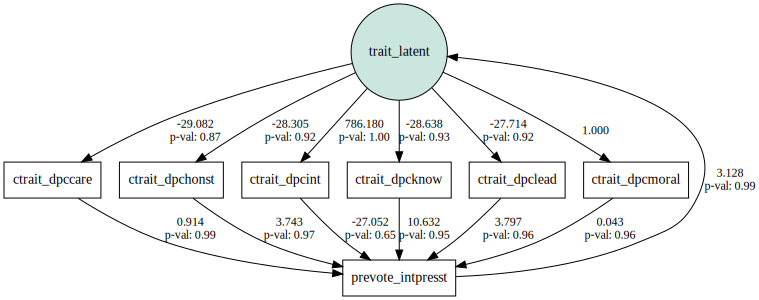

In [151]:
semplot(semModel,"model.png",plot_covs=True)

In [152]:
semModel.predict_factors(df1).describe()

,trait_latent
count,2.618000e+03
mean,4.953583e-01
std,1.232583e-14
min,4.953583e-01
25%,4.953583e-01
50%,4.953583e-01
75%,4.953583e-01
max,4.953583e-01


In [153]:
model3 = '''
#latent definition
trait_latent =~ ctrait_rpcmoral + ctrait_rpclead + ctrait_rpccare +\
                ctrait_rpcknow + ctrait_rpcint + ctrait_rpchonst
affect_latent =~ candaff_angrpcoft + candaff_hprpcoft +\
                candaff_afrrpcoft + candaff_prdrpcoft

#structure
prevote_intpresst ~ ctrait_rpcmoral + ctrait_rpclead + ctrait_rpccare + ctrait_rpcknow +\
                    ctrait_rpcint + ctrait_rpchonst + candaff_angrpcoft + candaff_hprpcoft +\
                    candaff_afrrpcoft + candaff_prdrpcoft
                    
trait_latent, affect_latent ~ prevote_intpresst
'''

In [154]:
df2 = df[df['prevote_intpreswho'] == 2]

In [159]:
semModel2 = ModelMeans(model3)
semModel2.fit(df2)
semModel2.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,ctrait_rpcmoral,~,trait_latent,1.000000,-,-,-
1,ctrait_rpclead,~,trait_latent,1.123021,0.042233,26.590956,0.0
2,ctrait_rpccare,~,trait_latent,1.096789,0.040356,27.17765,0.0
3,ctrait_rpcknow,~,trait_latent,0.413411,0.099105,4.171433,0.00003
4,ctrait_rpcint,~,trait_latent,1.376314,0.103234,13.332022,0.0
5,ctrait_rpchonst,~,trait_latent,1.059940,0.041672,25.435437,0.0
6,candaff_angrpcoft,~,affect_latent,1.000000,-,-,-
7,candaff_hprpcoft,~,affect_latent,-0.026943,0.068879,-0.391162,0.695678
8,candaff_afrrpcoft,~,affect_latent,0.878515,0.126262,6.957883,0.0
9,candaff_prdrpcoft,~,affect_latent,-0.285897,0.088497,-3.23057,0.001235


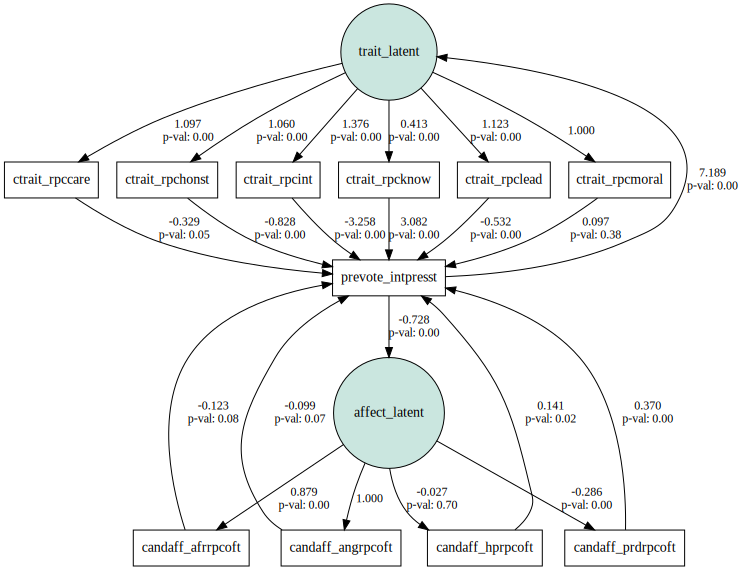

In [160]:
semplot(semModel2,"model2.png",plot_covs=True)

In [164]:
semModel2.predict_factors(df2).value_counts()

affect_latent  trait_latent
-0.572959      5.658319        1724
dtype: int64

In [165]:
stats = semopy.calc_stats(semModel2)
print(stats.T)

                    Value
DoF             22.000000
DoF Baseline    44.000000
chi2            12.343394
chi2 p-value     0.949876
chi2 Baseline   16.454297
CFI              0.649433
GFI              0.249838
AGFI            -0.500325
NFI              0.249838
TLI              0.298867
RMSEA            0.000000
AIC             87.494594
BIC            327.400302
LogLik           0.252703


In [166]:
model4 = '''
#structure
prevote_intpresst ~ ctrait_rpcmoral + ctrait_rpclead + ctrait_rpccare + ctrait_rpcknow +\
                    ctrait_rpcint + ctrait_rpchonst + candaff_angrpcoft + candaff_hprpcoft +\
                    candaff_afrrpcoft + candaff_prdrpcoft
'''

In [170]:
semModel2 = ModelMeans(model4)
semModel2.fit(df2)
semModel2.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,prevote_intpresst,~,ctrait_rpcmoral,0.010270,0.020788,0.494026,6.212875e-01
1,prevote_intpresst,~,ctrait_rpclead,0.013224,0.023375,0.565749,5.715645e-01
2,prevote_intpresst,~,ctrait_rpccare,0.053055,0.025079,2.115512,3.438631e-02
3,prevote_intpresst,~,ctrait_rpcknow,0.031943,0.030619,1.043246,2.968342e-01
4,prevote_intpresst,~,ctrait_rpcint,-0.013456,0.029226,-0.460407,6.452238e-01
5,prevote_intpresst,~,ctrait_rpchonst,0.043573,0.023114,1.885104,5.941581e-02
6,prevote_intpresst,~,candaff_angrpcoft,-0.025284,0.013892,-1.819983,6.876154e-02
7,prevote_intpresst,~,candaff_hprpcoft,0.025218,0.013837,1.822579,6.836722e-02
8,prevote_intpresst,~,candaff_afrrpcoft,-0.046617,0.018038,-2.584308,9.757450e-03
9,prevote_intpresst,~,candaff_prdrpcoft,0.032421,0.011707,2.769273,5.618160e-03


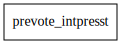

In [173]:
semplot(semModel2,"model2.png")

In [169]:
stats = semopy.calc_stats(semModel2)
print(stats.T)

                   Value
DoF           -11.000000
DoF Baseline   -1.000000
chi2            0.000006
chi2 p-value         NaN
chi2 Baseline   0.942560
CFI            -4.662635
GFI             0.999993
AGFI            0.999999
NFI             0.999993
TLI             0.485215
RMSEA                NaN
AIC            22.516707
BIC            87.945536
LogLik          0.741647


C:\Users\singl\Anaconda3\lib\site-packages\semopy\stats.py:386: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((chi2 / dof - 1) / (model.n_samples - 1))


In [139]:
semopy.examples.political_democracy.get_data()

,y1,y2,y3,y4,y5,y6,y7,y8,x1,x2,x3
1,2.50,0.000000,3.333333,0.000000,1.250000,0.000000,3.726360,3.333333,4.442651,3.637586,2.557615
2,1.25,0.000000,3.333333,0.000000,6.250000,1.100000,6.666666,0.736999,5.384495,5.062595,3.568079
3,7.50,8.800000,9.999998,9.199991,8.750000,8.094061,9.999998,8.211809,5.961005,6.255750,5.224433
4,8.90,8.800000,9.999998,9.199991,8.907948,8.127979,9.999998,4.615086,6.285998,7.567863,6.267495
5,10.00,3.333333,9.999998,6.666666,7.500000,3.333333,9.999998,6.666666,5.863631,6.818924,4.573679
...,...,...,...,...,...,...,...,...,...,...,...
71,5.40,9.999998,6.666666,3.333333,3.750000,6.666666,6.666666,1.485166,4.477337,3.091042,1.987909
72,7.50,8.800000,9.999998,6.066666,7.500000,6.666666,9.999998,6.666666,5.337538,5.631212,3.491004
73,7.50,7.000000,9.999998,6.852998,7.500000,6.348340,6.666666,7.508044,6.129050,6.403574,5.001796
74,10.00,6.666666,9.999998,10.000000,10.000000,6.666666,9.999998,10.000000,5.003946,4.962845,3.976994


In [140]:
data = multivariate_regression.get_data()
data

,y1,y2,y3,x1,x2,x3
0,-1.989468,-0.015637,-0.162064,-0.086448,-0.728435,-0.158917
1,-0.777919,4.919949,1.222909,-0.722815,-0.552797,-2.290903
2,-1.951388,1.024939,2.402742,0.127013,0.796024,-0.040658
3,-2.084306,1.430075,-0.308923,0.317103,-0.015630,0.915825
4,1.729722,-3.632137,-2.926315,0.129123,-1.922594,1.652257
...,...,...,...,...,...,...
95,-3.850754,0.661794,-0.555356,-0.086717,0.636323,0.861046
96,-1.180733,1.595003,1.175348,-0.648488,-0.045442,-0.328253
97,0.658198,2.713970,2.133264,0.085195,-0.703850,-1.978876
98,-0.319996,2.372079,1.515024,0.510689,-0.335403,-1.551753


In [141]:
data['x2'].iloc[1:4] = 0

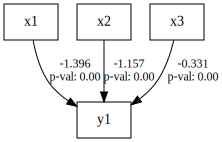

In [142]:
model2 = '''
y1 ~ x1 + x2 + x3
'''

semModel = Model(model2)
semModel.fit(data)
semModel.inspect()

semplot(semModel,"model.png",plot_covs=True)

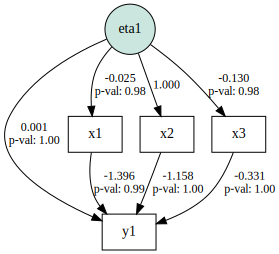

In [143]:
model2 = '''
#latent definition
eta1 =~ x2 + x3 + x1 + y1

#structure
y1 ~ x1 + x2 + x3
'''

semModel = Model(model2)
semModel.fit(data)
semModel.inspect()

semplot(semModel,"model.png",plot_covs=True)

In [144]:
model1 = '''
#latent definition
eta1 =~ y2 + y3
eta2 =~ x2 + x3 + x1
eta3, eta4 =~ y1

#structure
eta3 ~ x1 + x2 + x3
eta4 ~ y2 + y3

#additional covariance
eta3 ~~ eta4
'''

In [145]:
semModel = Model(model1)
semModel.fit(data)
semModel.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,y2,~,eta1,1.000000,-,-,-
1,y3,~,eta1,1.188872,0.158818,7.485764,0.0
2,x2,~,eta2,1.000000,-,-,-
3,x3,~,eta2,-1.219674,0.233911,-5.214274,0.0
4,x1,~,eta2,0.382039,0.107527,3.552961,0.000381
5,eta3,~,x1,-1.525951,0.07943,-19.211194,0.0
6,eta3,~,x2,-0.970558,0.177653,-5.46323,0.0
7,eta3,~,x3,-0.523004,0.145087,-3.60476,0.000312
8,eta4,~,y2,-0.173346,0.055119,-3.144923,0.001661
9,eta4,~,y3,0.002497,0.098635,0.025311,0.979807


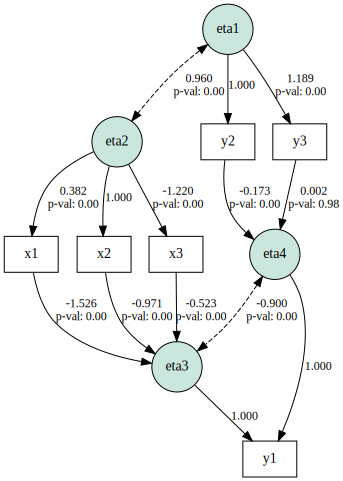

In [146]:
semplot(semModel,"model.png",plot_covs=True)